# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [173]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [174]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [175]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [176]:
# Create a Beautiful Soup Object
html = browser.html
website = soup(html, "html.parser")

In [177]:
# Extract all rows of data

table = website.find("table", class_="table")
rows = table.find_all("tr",class_="data-row")
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [178]:
# Create an empty list

data_list = []

# Loop through the scraped data to create a list of rows

for row in rows:
    row_data = row.find_all('td')
    row_data = [x.text for x in row_data]
    data_list.append(row_data)

In [179]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_list)
columns = []
headers = table.find_all("th")
for x in headers:
    columns.append(x.text)
    
df.columns = columns

In [180]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [181]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [193]:
# Change data types for data analysis
df['terrestrial_date'] =  pd.to_datetime(df['terrestrial_date'])

df = df.astype({'id': 'int32',
           'sol': 'int32',
           'ls': 'int32',
           'month': 'int32',
           'min_temp': 'float',
           'pressure': 'float'
          })

In [195]:
# Confirm type changes were successful by examining data types again
df.dtypes
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [248]:
# 1. How many months are there on Mars?

len(df["month"].unique())

12

According to the Planetary Society, Mars doesn't have its own months because it doesn't have a moon that circles it like earth does. Thanks google!

In [205]:
# 2. How many Martian days' worth of data are there?

df["sol"].count()

1867

In [219]:
# 3. What is the average low temperature by month?

monthly_temp = df.groupby("month").mean()["min_temp"]
monthly_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<AxesSubplot:xlabel='month'>

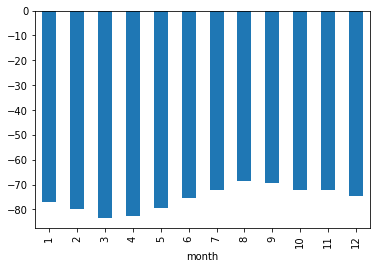

In [220]:
# Plot the average temperature by month

monthly_temp.plot(kind='bar')

In [245]:
# Identify the coldest and hottest months in Curiosity's location

coldest = monthly_temp.min()
hottest = monthly_temp.max()

temp_df = pd.DataFrame(monthly_temp)

#which month is the coldest?

temp_df.loc[temp_df['min_temp'] == coldest]

,min_temp
month,
3,-83.307292


The 3rd Martian month has the lowest average minimum temperature. Yikes that's cold!

In [247]:
#which month is the hottest?
temp_df.loc[temp_df['min_temp'] == hottest]

,min_temp
month,
8,-68.382979


The 8th Martian month has the highest average minimum temperature. It's not exactly 'summer' temp though!


In [217]:
# 4. Average pressure by Martian month
monthly_pressure = df.groupby("month").mean()["pressure"]
monthly_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<AxesSubplot:xlabel='month'>

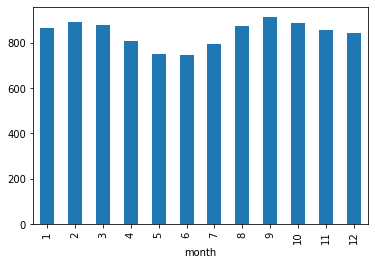

In [218]:
# Plot the average pressure by month
monthly_pressure.plot(kind='bar')

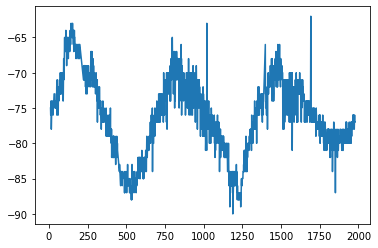

In [251]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
# Consider how many days elapse on Earth in the time that Mars circles the Sun once.
# Visually estimate the result by plotting the daily minimum temperature.

plt.plot(df['sol'],df['min_temp'])


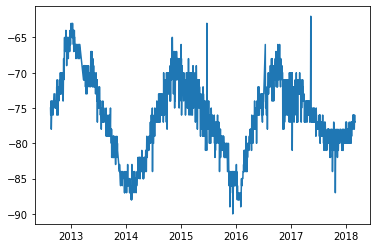

In [252]:
plt.plot(df['terrestrial_date'],df['min_temp'])


The peak temperatures appear to occur at sol 125, 800, and 1500 - this would indicate that a year on Mars is between 675 and 700 sols long. Looking at the two graphs, we see that the peaks and troughs line up with the years, and we know that 2 years is equal to 730 days. It looks like there are about 730 days in a Martian year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [254]:
# Write the data to a CSV
df.to_csv('output')

In [ ]:
browser.quit()